### Support Vector Classifier Task

##### 심장마비 가능성 예측


##### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

##### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
import pandas as pd

heart_df = pd.read_csv('./datasets/heart.csv')
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
heart_df.duplicated().sum()

1

In [5]:
heart_df[heart_df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
heart_df.drop_duplicates(inplace=True)
heart_df.duplicated().sum()

0

In [7]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


##### 상관 관계 분석
- cp, thalachh, slp, restecg

Text(0.5, 1.0, 'Correlation')

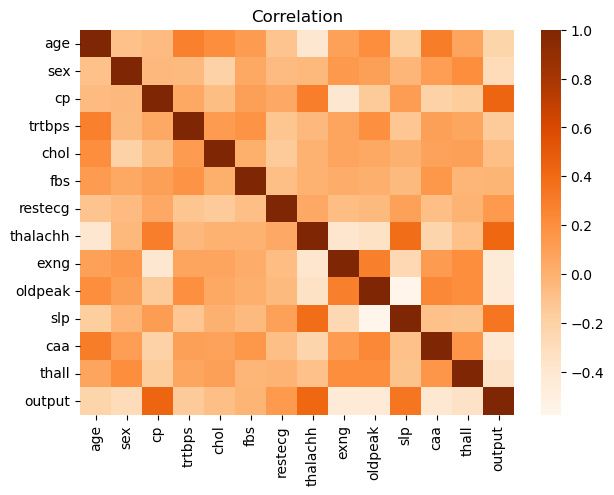

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = heart_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [9]:
# 1. 상관관계 수치를 내림차순 정렬
# 2. 첫 번째 행 추출(가장 수치가 높은 데이터의 행)
# 3. 내림차순 정렬(상관 관계가 높은 순)
corr.sort_values(by="output", ascending=False).iloc[0].sort_values(ascending=False)

output      1.000000
cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

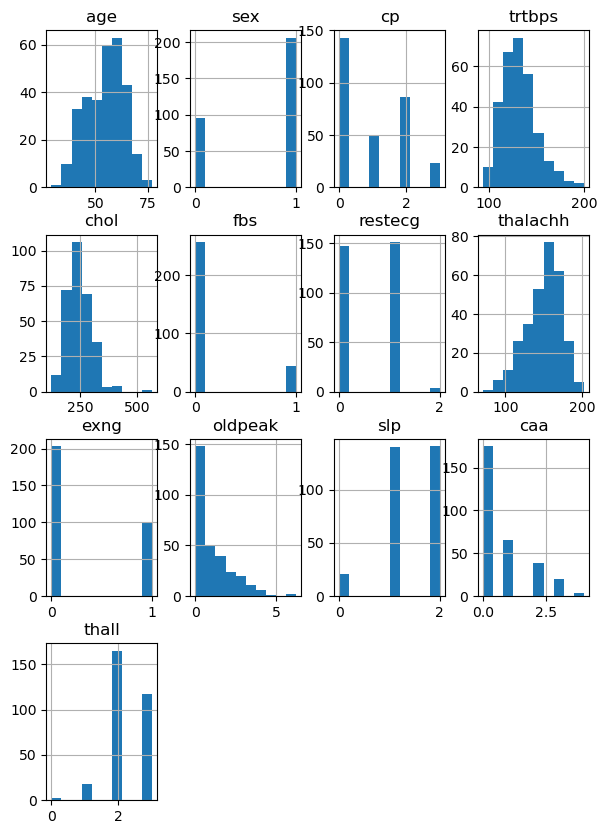

In [10]:
heart_df.iloc[:, :-1].hist(figsize=(7, 10))

##### 표준화를 통한 이상치 제거
- 표준화된 값이 평균을 기준으로 떨어져 있는 거리이므로, ±1.96 범위를 벗어난다면 이상치에 포함된다.  
- 상관 관계 비중이 높은 cp, thalachh, slp, restecg에 대해 이상치를 제거한다.

In [11]:
from sklearn.preprocessing import StandardScaler

features = heart_df.iloc[:, :-1]

standard_scale = StandardScaler()
standard_scale_features = standard_scale.fit_transform(features)
standard_scale_features_df = pd.DataFrame(standard_scale_features, columns=features.columns)

standard_scale_features_df['target'] = heart_df.output
standard_scale_features_df = standard_scale_features_df[~standard_scale_features_df['target'].isna()]
standard_scale_features_df.shape

(301, 14)

In [12]:
columns = ['thalachh', 'slp']

for column in columns:
    print(f'{column}: {standard_scale_features_df[~standard_scale_features_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 12건
slp: 21건


In [13]:
columns = ['thalachh', 'slp']
for column in columns:
    standard_scale_features_df.drop(standard_scale_features_df[~standard_scale_features_df[column].between(-1.96, 1.96)][column].index, axis=0, inplace=True)

for column in columns:
    print(f'{column}: {standard_scale_features_df[~standard_scale_features_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 0건
slp: 0건


In [14]:
heart_df = heart_df.iloc[standard_scale_features_df.index, :].reset_index(drop=True)
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
2,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
266,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
267,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
268,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### 파이프라인 구축
- 정규화
- 하이퍼 파라미터 튜닝

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

grid_support_vector = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=5, refit=True, return_train_score=True, n_jobs=4)

features, targets = heart_df.iloc[:, :-1], heart_df.output

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2)

svc_pipeline = Pipeline([('normalizer', Normalizer()), ('support_vector_classifier', grid_support_vector)])
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('support_vector_classifier',
                 GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=4,
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                          'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                          'kernel': ['linear', 'rbf']},
                              return_train_score=True))])

In [16]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_support_vector.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
57,"{'C': 100, 'gamma': 10, 'kernel': 'rbf'}",0.782558,1,0.750000,0.790698,0.813953
59,"{'C': 100, 'gamma': 100, 'kernel': 'rbf'}",0.694926,2,0.590909,0.627907,0.720930
47,"{'C': 10, 'gamma': 100, 'kernel': 'rbf'}",0.690275,3,0.590909,0.697674,0.744186
48,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.681395,4,0.500000,0.744186,0.767442
50,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}",0.681395,4,0.500000,0.744186,0.767442
52,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",0.681395,4,0.500000,0.744186,0.767442
58,"{'C': 100, 'gamma': 100, 'kernel': 'linear'}",0.681395,4,0.500000,0.744186,0.767442
54,"{'C': 100, 'gamma': 1, 'kernel': 'linear'}",0.681395,4,0.500000,0.744186,0.767442
56,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.681395,4,0.500000,0.744186,0.767442
55,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.681078,10,0.568182,0.767442,0.744186


##### 평가
- 오차 행렬
- 정확도
- 정밀도
- 재현율
- F1 score
- ROC-AUC

In [17]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, prediction_proba=None, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[17  6]
 [ 5 26]]
정확도: 0.7963, 정밀도: 0.8125, 재현율: 0.8387, F1:0.8254, AUC:0.9004
###########################################################################


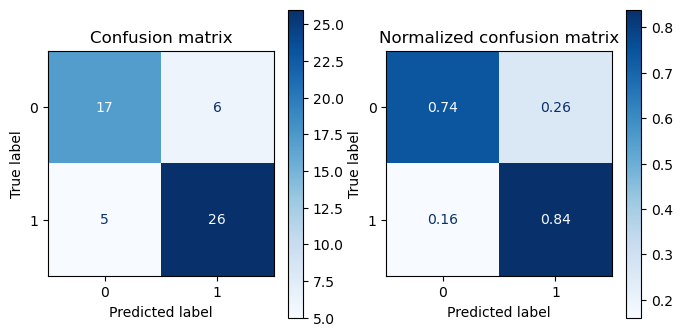

In [18]:
# svc_pipeline.fit(X_train, y_train)

prediction = svc_pipeline.predict(X_test)

prediction_proba = svc_pipeline.predict_proba(X_test)[:, 1]
get_evaluation(y_test, prediction, prediction_proba, svc_pipeline, X_test)